# Cleaning and EDA

In [5]:
import numpy as np
from bs4 import BeautifulSoup
import requests
from sklearn.linear_model import RidgeCV
import scipy.stats as stats
import statsmodels.api as sm
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import random
import os
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import pickle
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

### Load Scraped Dict

In [6]:
with open('../data/dict_3day.pkl', 'rb') as f:
     df_dict = pickle.load(f)

In [7]:
with open('../data/dict_3day_2.pkl', 'rb') as f:
     df_dict_2 = pickle.load(f)

In [8]:
with open('../data/dict_3day_3lt.pkl', 'rb') as f:
     df_dict_3 = pickle.load(f)

# Pandas Cleaning

In [9]:
import pandas as pd
df3 = pd.DataFrame.from_dict(df_dict_3,orient='index')
df2 = pd.DataFrame.from_dict(df_dict_2,orient='index')
df = pd.DataFrame.from_dict(df_dict,orient='index')

In [10]:
def clean_df(df):
    df[df.columns[0:2]] = df[df.columns[0:2]].apply(
        lambda x: x.str.replace('$', '')).apply(
            lambda x: x.str.replace(',', ''))
    df = df[~df[1].str.contains('\.')]
    df = df[~df[1].str.contains('CA')]
    df = df[~df[1].str.contains('€')]
    df = df[~df[1].str.contains('£')]
    df = df[~df[1].str.contains(' ')]
    df['y'] = df[0].astype(int) / df[1].astype(int)

    df = df.rename(
        index=str,
        columns={
            0: "pledged",
            1: "goal",
            2: "all_text",
            3: "summary_text",
            4: "suggest_pledge",
            5: "photo_cnt",
            6: "video_header",
            7: "num_gift_options",
            8: "avg_pledge_options",
            9: "all_sentiment_pos",
            10: "all_sentiment_neg",
            11: "all_sentiment_neu",
            12: "all_sentiment_comp",
            13: "summary_sentiment_pos",
            14: "summary_sentiment_neg",
            15: "summary_sentiment_neu",
            16: "summary_sentiment_comp",
            17: "project_length"
        })

    df[[
        'pledged', 'goal', 'all_text', 'summary_text', 'avg_pledge_options',
        'suggest_pledge', 'photo_cnt', 'num_gift_options', 'video_header',
        'all_sentiment_pos', 'all_sentiment_neg', 'project_length',
        'all_sentiment_neu', 'all_sentiment_comp', 'summary_sentiment_pos',
        'summary_sentiment_neg', 'summary_sentiment_neu',
        'summary_sentiment_comp'
    ]] = df[[
        'pledged', 'goal', 'all_text', 'summary_text', 'avg_pledge_options',
        'suggest_pledge', 'photo_cnt', 'num_gift_options', 'video_header',
        'all_sentiment_pos', 'all_sentiment_neg', 'project_length',
        'all_sentiment_neu', 'all_sentiment_comp', 'summary_sentiment_pos',
        'summary_sentiment_neg', 'summary_sentiment_neu',
        'summary_sentiment_comp'
    ]].astype(float)
    
    return df

In [11]:
df = clean_df(df)
df2 = clean_df(df2)
df3 = clean_df(df3)

In [12]:
df = pd.concat([df,df2,df3])

# EDA

In [13]:
df.describe()

,pledged,goal,all_text,summary_text,suggest_pledge,photo_cnt,video_header,num_gift_options,avg_pledge_options,all_sentiment_pos,all_sentiment_neg,all_sentiment_neu,all_sentiment_comp,summary_sentiment_pos,summary_sentiment_neg,summary_sentiment_neu,summary_sentiment_comp,project_length,y
count,320.000000,320.000000,320.000000,320.000000,320.0,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,9254.718750,21684.837500,580.159375,15.190625,10.0,9.000000,0.553125,7.459375,360.438144,0.140803,0.034366,0.818556,0.824831,0.153441,0.037803,0.808741,0.237769,34.353125,10.734186
std,42969.401172,72843.636913,617.621489,6.468000,0.0,14.544926,0.497948,6.020204,806.697537,0.062874,0.034490,0.091246,0.422794,0.163678,0.083762,0.177451,0.387968,16.218637,160.957322
min,1.000000,1.000000,10.000000,1.000000,10.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.998700,0.000000,0.000000,0.069000,-0.831600,1.000000,0.000001
25%,51.000000,1000.000000,203.000000,9.000000,10.0,0.000000,0.000000,4.000000,35.000000,0.099000,0.009750,0.782250,0.930500,0.000000,0.000000,0.689250,0.000000,23.000000,0.006000
50%,678.000000,5000.000000,397.000000,16.000000,10.0,4.000000,1.000000,6.500000,94.875000,0.137000,0.023000,0.827500,0.987450,0.123500,0.000000,0.821500,0.225350,29.000000,0.378825
75%,4163.500000,10472.000000,773.000000,20.000000,10.0,11.000000,1.000000,9.250000,276.654762,0.180000,0.046000,0.861250,0.997425,0.269750,0.000000,1.000000,0.571900,49.000000,1.260717
max,636914.000000,750000.000000,5049.000000,28.000000,10.0,99.000000,1.000000,40.000000,10000.000000,0.394000,0.184000,1.000000,1.000000,0.785000,0.487000,1.000000,0.930000,60.000000,2880.000000


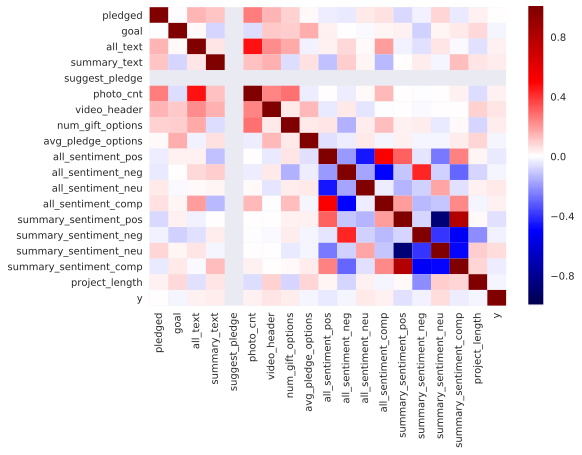

In [14]:
sns.heatmap(df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

### Outlier Removal - 20X IQR

In [15]:
df = df.loc[df['pledged'] > 1]
df = df.loc[df['goal'] > 1]
df = df.loc[df['all_text'] < 5000]  # Removes the highest extreme Cook's distance x-point

In [16]:
def remove_outlier(df, col, mult=3):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    lower_bound  = q1 - (mult  * iqr)
    upper_bound = q3 + (mult * iqr)

    out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return out_df

In [17]:
df = remove_outlier(df,'pledged',mult=20)
df = remove_outlier(df,'goal',mult=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2898e6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2898edd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2898e550>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2899f518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2899f898>],
 'means': []}

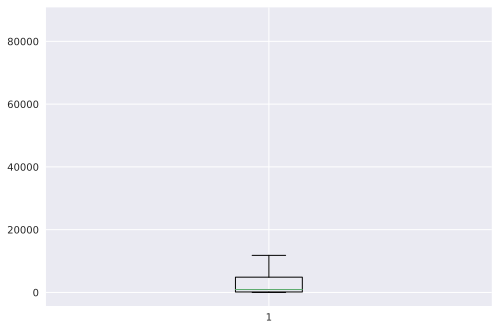

In [18]:
plt.boxplot(df['pledged'])

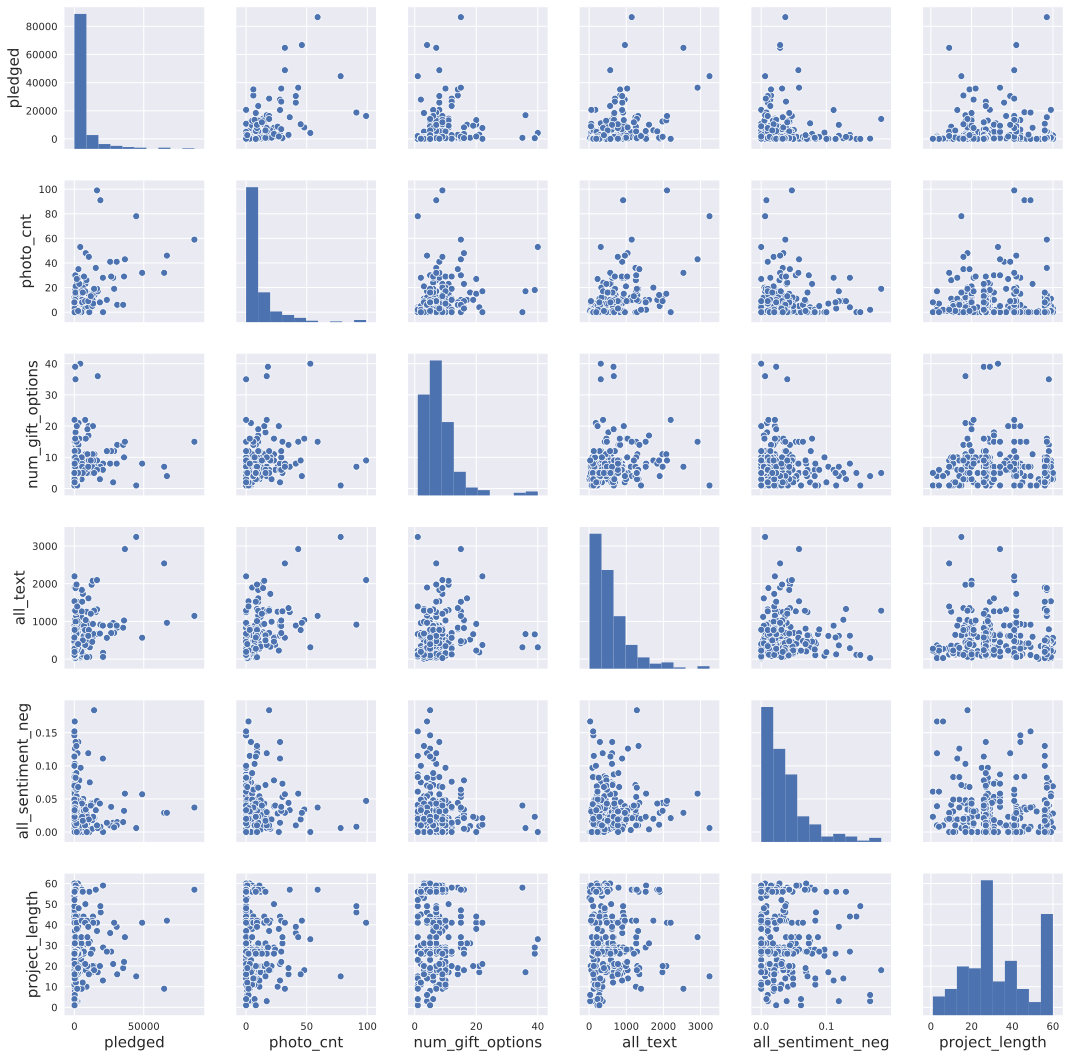

In [19]:
sns.pairplot(df[['pledged','photo_cnt','num_gift_options','all_text','all_sentiment_neg','project_length']])

### Dependent y (pledged)

(array([225.,  23.,   8.,   5.,   3.,   2.,   0.,   2.,   0.,   1.]),
 array([2.00000e+00, 8.65250e+03, 1.73030e+04, 2.59535e+04, 3.46040e+04,
        4.32545e+04, 5.19050e+04, 6.05555e+04, 6.92060e+04, 7.78565e+04,
        8.65070e+04]),
 <a list of 10 Patch objects>)

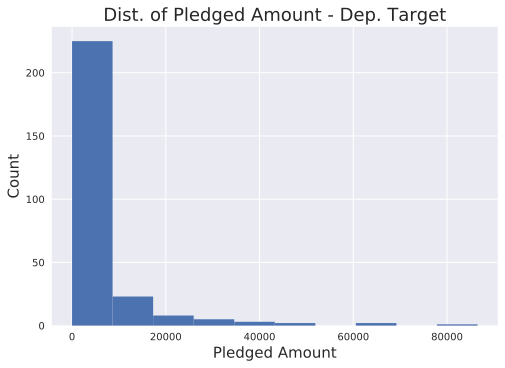

In [20]:
plt.ylabel('Count')
plt.xlabel('Pledged Amount')
plt.title('Dist. of Pledged Amount - Dep. Target')
plt.hist(df['pledged'])

### Dependent y (pledged) Log Transformation

(array([10., 14., 15., 29., 34., 44., 47., 38., 28., 10.]),
 array([ 0.69314718,  1.76063052,  2.82811387,  3.89559721,  4.96308055,
         6.0305639 ,  7.09804724,  8.16553058,  9.23301393, 10.30049727,
        11.36798061]),
 <a list of 10 Patch objects>)

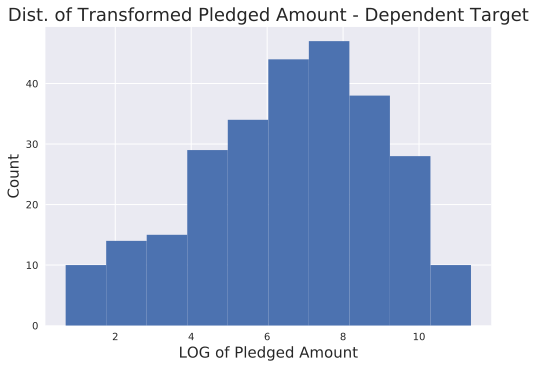

In [21]:
df['y_log'] = np.log(df['pledged'])
plt.ylabel('Count')
plt.xlabel('LOG of Pledged Amount')
plt.title('Dist. of Transformed Pledged Amount - Dependent Target')
plt.hist(df['y_log'])

### Boxcox Transformations of Features

In [22]:
lamb=stats.boxcox_normmax(df.num_gift_options, brack=(-1.9, 1.9))
print("Lambda:", lamb)
num_gift_options_t =(np.power(df.num_gift_options,lamb)-1)/lamb
df['num_gift_options_t'] = (np.power(df.num_gift_options,lamb)-1)/lamb

Lambda: 0.23320947696282754


(array([ 77., 103.,  56.,  18.,   6.,   4.,   0.,   0.,   2.,   3.]),
 array([ 1. ,  4.9,  8.8, 12.7, 16.6, 20.5, 24.4, 28.3, 32.2, 36.1, 40. ]),
 <a list of 10 Patch objects>)

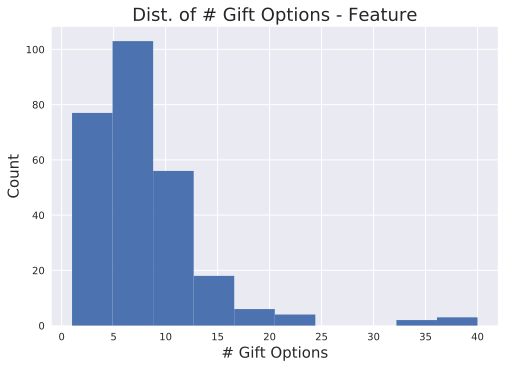

In [23]:
plt.ylabel('Count')
plt.xlabel('# Gift Options')
plt.title('Dist. of # Gift Options - Feature')
plt.hist(df['num_gift_options'])

(array([22., 13., 42., 52., 73., 34., 19.,  9.,  0.,  5.]),
 array([0.        , 0.58480744, 1.16961488, 1.75442231, 2.33922975,
        2.92403719, 3.50884463, 4.09365207, 4.6784595 , 5.26326694,
        5.84807438]),
 <a list of 10 Patch objects>)

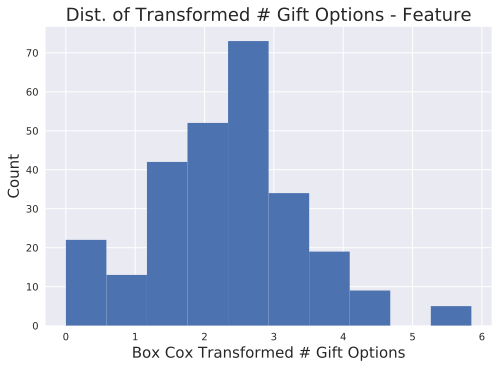

In [24]:
plt.ylabel('Count')
plt.xlabel('Box Cox Transformed # Gift Options')
plt.title('Dist. of Transformed # Gift Options - Feature')
plt.hist(df['num_gift_options_t'])

### Yeo-Johnson Transformation of Features
Used for when there 0 or negative values in the observations. In these cases, there are 0 values, so you can't Boxcox transform.

In [25]:
pt = PowerTransformer()
pt.fit(df['all_sentiment_neg'].values.reshape(-1,1))
df['all_sentiment_neg_t'] = pt.transform(df['all_sentiment_neg'].values.reshape(-1,1))

In [26]:
pt = PowerTransformer()
pt.fit(df['photo_cnt'].values.reshape(-1,1))
df['photo_cnt_t'] = pt.transform(df['photo_cnt'].values.reshape(-1,1))

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2a00e550>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2a00ec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2a00e3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2a016390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2a016710>],
 'means': []}

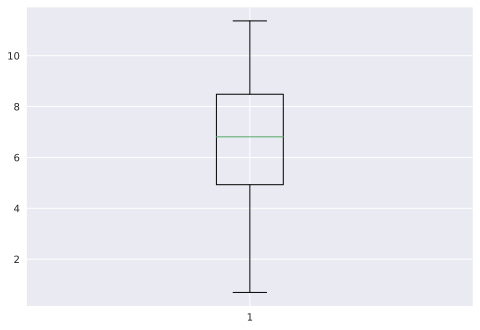

In [27]:
plt.boxplot(df['y_log'])

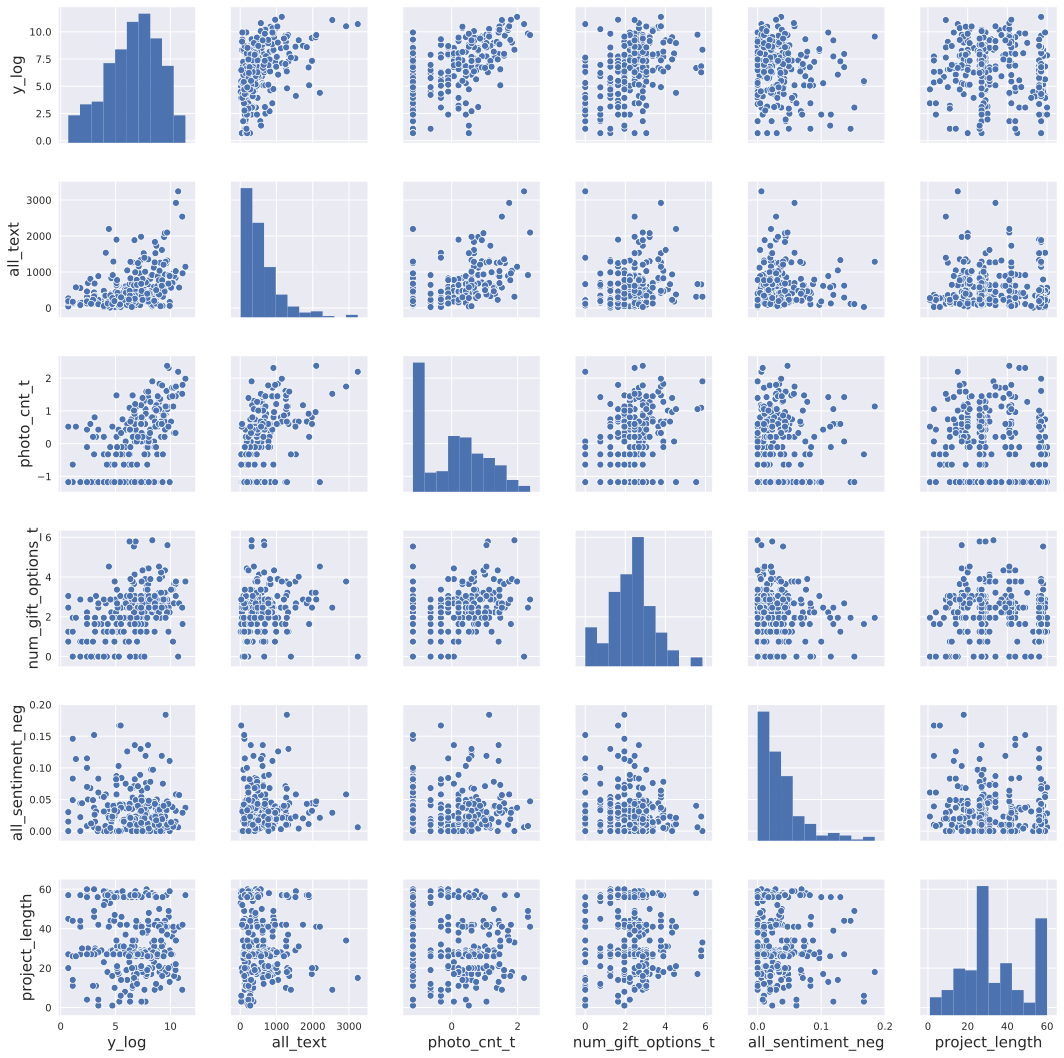

In [28]:
sns.pairplot(df[['y_log','all_text','photo_cnt_t','num_gift_options_t','all_sentiment_neg','project_length']])

In [29]:
df.to_pickle("../data/cleaned_df.pkl")